In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# #list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c["type"])


# columns = inspector.get_columns('station')
# for c in columns:
#     print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

In [10]:
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [13]:
conn = engine.connect()

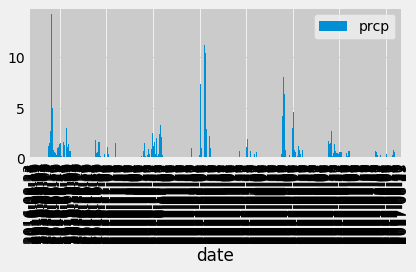

In [14]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
last_year
# Perform a query to retrieve the data and precipitation scores
sel=[Measurement.date,
     func.sum(Measurement.prcp),
    ]
precipitation = session.query(*sel).filter(Measurement.date>=last_year).group_by(Measurement.date)
precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation,columns=['date','prcp'])
df.set_index('date',inplace=True)
# Sort the dataframe by date
df.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.show()



In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(func.count(Station.station)).all()
stations

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel=[Measurement.station,
     func.count(Measurement.station)
    ]
popular_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
popular_station

('USC00519281', 2772)

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel1 = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
       ]
popular_temperature=session.query(*sel1).filter(Measurement.station=='USC00519281').all()
popular_temperature

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()
last_date
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,18) - dt.timedelta(days=365)
last_year
# # Perform a query to retrieve the data and precipitation scores
sel1=[Measurement.date,
     func.sum(Measurement.tobs),
    ]
# precipitation = session.query(*sel).filter(Measurement.date>=last_year).group_by(Measurement.date)
# precipitation
# # Save the query results as a Pandas DataFrame and set the index to the date column
# df = pd.DataFrame(precipitation,columns=['date','prcp'])
# df.set_index('date',inplace=True)
# # Sort the dataframe by date
# df.sort_values(by=['date'])
# # Use Pandas Plotting with Matplotlib to plot the data
# df.plot.bar()
# plt.tight_layout()
# plt.show()

# Close session

In [24]:
# Close Session
session.close()